# **Best Model Comparison**

### **Import**

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### **Load the Data**

In [165]:
df = pd.read_csv('../cleaned_data.csv')

## **Best Model for each Algorithm**

### **KNN: Model 6: Selected Features (K=5)**

Accuracy: 0.8794


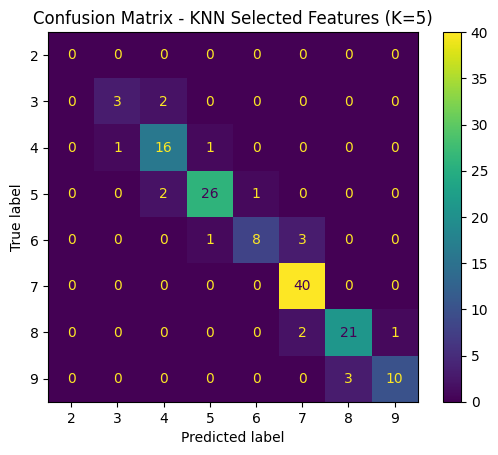

Precision: 0.8803
Recall: 0.8794
F1-Score: 0.8764


In [166]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

X_train_selected5, X_test_selected5, y_train_selected5, y_test_selected5 = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

knn_selected = KNeighborsClassifier(n_neighbors=5)
knn_selected.fit(X_train_selected5, y_train_selected5)
y_pred_knn = knn_selected.predict(X_test_selected5)

print(f"Accuracy: {metrics.accuracy_score(y_test_selected5, y_pred_knn):.4f}")

conf_matrix_knn = confusion_matrix(y_test_selected5, y_pred_knn, labels=knn_selected.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=knn_selected.classes_)
disp_knn.plot()
plt.title('Confusion Matrix - KNN Selected Features (K=5)')
plt.show()

precision = precision_score(y_test_selected5, y_pred_knn, average='weighted')
recall = recall_score(y_test_selected5, y_pred_knn, average='weighted')
f1 = f1_score(y_test_selected5, y_pred_knn, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### **Logistic Regression: Model 1: All Features**

Accuracy: 0.9078


/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


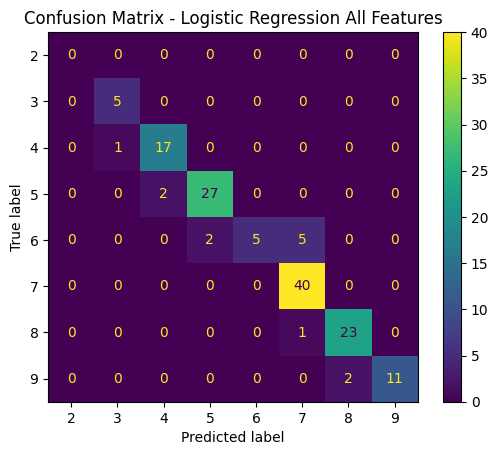

Precision: 0.9158
Recall: 0.9078
F1-Score: 0.8993


In [167]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

lr = LogisticRegression(max_iter=1000, random_state=5)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_lr):.4f}")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=lr.classes_)
disp_lr.plot()
plt.title('Confusion Matrix - Logistic Regression All Features')
plt.show()

precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### **SVM: Model 2: Selected Features**

Accuracy: 0.8582


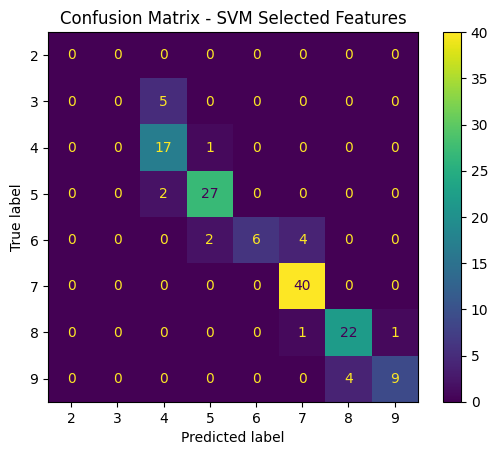

Precision: 0.8398
Recall: 0.8582
F1-Score: 0.8373


/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [168]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

svm_selected = SVC(kernel='rbf', random_state=5)
svm_selected.fit(X_train_selected, y_train_selected)
y_pred_svm = svm_selected.predict(X_test_selected)

print(f"Accuracy: {metrics.accuracy_score(y_test_selected, y_pred_svm):.4f}")

conf_matrix_svm = confusion_matrix(y_test_selected, y_pred_svm, labels=svm_selected.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_selected.classes_)
disp_svm.plot()
plt.title('Confusion Matrix - SVM Selected Features')
plt.show()

precision = precision_score(y_test_selected, y_pred_svm, average='weighted')
recall = recall_score(y_test_selected, y_pred_svm, average='weighted')
f1 = f1_score(y_test_selected, y_pred_svm, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### **Naive Bayes: Model 1: All Features** 

Accuracy: 0.8511


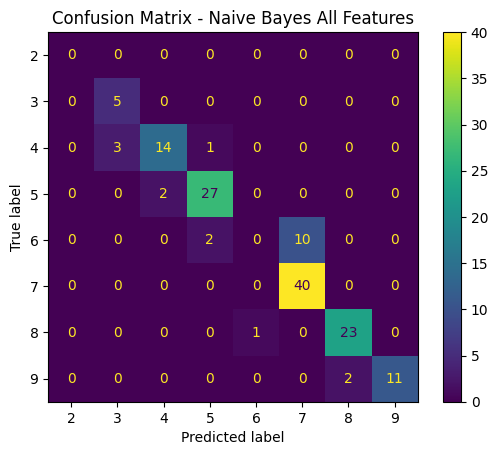

Precision: 0.7947
Recall: 0.8511
F1-Score: 0.8171


In [169]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_nb):.4f}")

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=nb.classes_)
disp_nb.plot()
plt.title('Confusion Matrix - Naive Bayes All Features')
plt.show()

precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### **Decision Tree: Model 1: All Features**

Accuracy: 0.9291


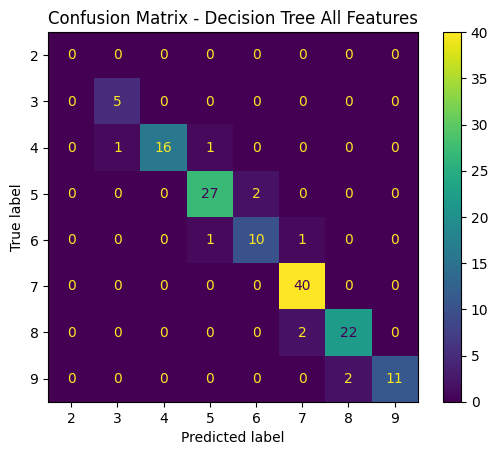

Precision: 0.9317
Recall: 0.9291
F1-Score: 0.9288


In [170]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_dt):.4f}")

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=dt.classes_)
disp_dt.plot()
plt.title('Confusion Matrix - Decision Tree All Features')
plt.show()

precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### **Random Forest: Model 1: All Features**	

Accuracy: 0.9504


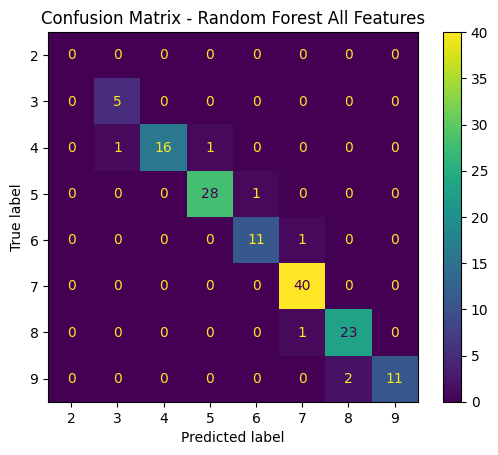

Precision: 0.9528
Recall: 0.9504
F1-Score: 0.9501


In [171]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_rf):.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest All Features')
plt.show()

precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

## **Model Accuracy Comparison**

In [172]:
results = []

acc_knn = accuracy_score(y_test_selected5, y_pred_knn)
prec_knn = precision_score(y_test_selected5, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test_selected5, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_selected5, y_pred_knn, average='weighted')
results.append(['KNN: Selected Features (K=5)', acc_knn, prec_knn, rec_knn, f1_knn])

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
results.append(['Logistic Regression: All Features', acc_lr, prec_lr, rec_lr, f1_lr])

acc_svm = accuracy_score(y_test_selected, y_pred_svm)
prec_svm = precision_score(y_test_selected, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test_selected, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test_selected, y_pred_svm, average='weighted')
results.append(['SVM: Selected Features', acc_svm, prec_svm, rec_svm, f1_svm])

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb, average='weighted')
rec_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
results.append(['Naive Bayes: All Features', acc_nb, prec_nb, rec_nb, f1_nb])

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
results.append(['Decision Tree: All Features', acc_dt, prec_dt, rec_dt, f1_dt])

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
results.append(['Random Forest: All Features', acc_rf, prec_rf, rec_rf, f1_rf])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN: Selected Features (K=5),0.879433,0.880276,0.879433,0.876387
1,Logistic Regression: All Features,0.907801,0.915848,0.907801,0.899301
2,SVM: Selected Features,0.858156,0.839810,0.858156,0.837268
3,Naive Bayes: All Features,0.851064,0.794716,0.851064,0.817127
4,Decision Tree: All Features,0.929078,0.931744,0.929078,0.928777
5,Random Forest: All Features,0.950355,0.952779,0.950355,0.950059


## **Best Model for each Algorithm with Cross Validation (5 Folds)**

In [173]:
cv_results = []

### **KNN: Model 6: Selected Features (K=5)**

In [174]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']
X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

knn_cv = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_validate(knn_cv, X_selected, y_selected, cv=5, 
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
cv_results.append(['KNN: Selected Features (K=5)', 
                   scores_knn['test_accuracy'].mean(),
                   scores_knn['test_precision_weighted'].mean(),
                   scores_knn['test_recall_weighted'].mean(),
                   scores_knn['test_f1_weighted'].mean()])

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedM

### **Logistic Regression: Model 1: All Features**

In [175]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

lr_cv = LogisticRegression(max_iter=1000, random_state=5)
scores_lr = cross_validate(lr_cv, X, y, cv=5,
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
cv_results.append(['Logistic Regression: All Features',
                   scores_lr['test_accuracy'].mean(),
                   scores_lr['test_precision_weighted'].mean(),
                   scores_lr['test_recall_weighted'].mean(),
                   scores_lr['test_f1_weighted'].mean()])

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no

### **SVM: Model 2: Selected Features**

In [176]:
svm_cv = SVC(kernel='rbf', random_state=5)
scores_svm = cross_validate(svm_cv, X_selected, y_selected, cv=5,
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
cv_results.append(['SVM: Selected Features',
                   scores_svm['test_accuracy'].mean(),
                   scores_svm['test_precision_weighted'].mean(),
                   scores_svm['test_recall_weighted'].mean(),
                   scores_svm['test_f1_weighted'].mean()])

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedM

### **Naive Bayes: Model 1: All Features** 

In [177]:
nb_cv = GaussianNB()
scores_nb = cross_validate(nb_cv, X, y, cv=5,
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
cv_results.append(['Naive Bayes: All Features',
                   scores_nb['test_accuracy'].mean(),
                   scores_nb['test_precision_weighted'].mean(),
                   scores_nb['test_recall_weighted'].mean(),
                   scores_nb['test_f1_weighted'].mean()])

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedM

### **Decision Tree: Model 1: All Features**

In [178]:
dt_cv = DecisionTreeClassifier(random_state=5)
scores_dt = cross_validate(dt_cv, X, y, cv=5,
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
cv_results.append(['Decision Tree: All Features',
                   scores_dt['test_accuracy'].mean(),
                   scores_dt['test_precision_weighted'].mean(),
                   scores_dt['test_recall_weighted'].mean(),
                   scores_dt['test_f1_weighted'].mean()])

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### **Random Forest: Model 1: All Features**	

In [179]:
rf_cv = RandomForestClassifier(n_estimators=100, random_state=5)
scores_rf = cross_validate(rf_cv, X, y, cv=5,
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
cv_results.append(['Random Forest: All Features',
                   scores_rf['test_accuracy'].mean(),
                   scores_rf['test_precision_weighted'].mean(),
                   scores_rf['test_recall_weighted'].mean(),
                   scores_rf['test_f1_weighted'].mean()])

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## **Model Accuracy Comparison with Cross Validation**

In [180]:
cv_results_df = pd.DataFrame(cv_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
cv_results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN: Selected Features (K=5),0.794326,0.797043,0.794326,0.778602
1,Logistic Regression: All Features,0.784397,0.813160,0.784397,0.770130
2,SVM: Selected Features,0.829787,0.801633,0.829787,0.805527
3,Naive Bayes: All Features,0.734752,0.718517,0.734752,0.697923
4,Decision Tree: All Features,0.821277,0.832561,0.821277,0.817379
5,Random Forest: All Features,0.869504,0.886704,0.869504,0.855262


## **Model Accuracy Comparison with Optimization**

### **Random Forest Optimization**

In [181]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=5), param_grid_rf, 
                       cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Best Cross-Validation Score: {rf_grid.best_score_:.4f}")

y_pred_rf_opt = rf_grid.predict(X_test)
acc_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
prec_rf_opt = precision_score(y_test, y_pred_rf_opt, average='weighted')
rec_rf_opt = recall_score(y_test, y_pred_rf_opt, average='weighted')
f1_rf_opt = f1_score(y_test, y_pred_rf_opt, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {acc_rf_opt:.4f}")
print(f"Precision: {prec_rf_opt:.4f}")
print(f"Recall: {rec_rf_opt:.4f}")
print(f"F1-Score: {f1_rf_opt:.4f}")

optimized_results.append(['Random Forest: Optimized', acc_rf_opt, prec_rf_opt, rec_rf_opt, f1_rf_opt])

NameError: name 'GridSearchCV' is not defined

### **Decision Tree Optimization**

In [ ]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Decision Tree hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid_dt, 
                       cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best Cross-Validation Score: {dt_grid.best_score_:.4f}")

y_pred_dt_opt = dt_grid.predict(X_test)
acc_dt_opt = accuracy_score(y_test, y_pred_dt_opt)
prec_dt_opt = precision_score(y_test, y_pred_dt_opt, average='weighted')
rec_dt_opt = recall_score(y_test, y_pred_dt_opt, average='weighted')
f1_dt_opt = f1_score(y_test, y_pred_dt_opt, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {acc_dt_opt:.4f}")
print(f"Precision: {prec_dt_opt:.4f}")
print(f"Recall: {rec_dt_opt:.4f}")
print(f"F1-Score: {f1_dt_opt:.4f}")

optimized_results.append(['Decision Tree: Optimized', acc_dt_opt, prec_dt_opt, rec_dt_opt, f1_dt_opt])

### **Naive Bayes Optimization**

In [ ]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Naive Bayes hyperparameter tuning
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

nb_grid = GridSearchCV(GaussianNB(), param_grid_nb, 
                       cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_train, y_train)

print(f"Best Parameters: {nb_grid.best_params_}")
print(f"Best Cross-Validation Score: {nb_grid.best_score_:.4f}")

y_pred_nb_opt = nb_grid.predict(X_test)
acc_nb_opt = accuracy_score(y_test, y_pred_nb_opt)
prec_nb_opt = precision_score(y_test, y_pred_nb_opt, average='weighted')
rec_nb_opt = recall_score(y_test, y_pred_nb_opt, average='weighted')
f1_nb_opt = f1_score(y_test, y_pred_nb_opt, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {acc_nb_opt:.4f}")
print(f"Precision: {prec_nb_opt:.4f}")
print(f"Recall: {rec_nb_opt:.4f}")
print(f"F1-Score: {f1_nb_opt:.4f}")

optimized_results.append(['Naive Bayes: Optimized', acc_nb_opt, prec_nb_opt, rec_nb_opt, f1_nb_opt])

### **SVM Optimization with Gradient Descent**

In [ ]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']
X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, 
                                                                      test_size=0.2, random_state=5)

# SVM hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_grid = GridSearchCV(SVC(random_state=5), param_grid_svm, 
                        cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_sel, y_train_sel)

print(f"Best Parameters: {svm_grid.best_params_}")
print(f"Best Cross-Validation Score: {svm_grid.best_score_:.4f}")

y_pred_svm_opt = svm_grid.predict(X_test_sel)
acc_svm_opt = accuracy_score(y_test_sel, y_pred_svm_opt)
prec_svm_opt = precision_score(y_test_sel, y_pred_svm_opt, average='weighted')
rec_svm_opt = recall_score(y_test_sel, y_pred_svm_opt, average='weighted')
f1_svm_opt = f1_score(y_test_sel, y_pred_svm_opt, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {acc_svm_opt:.4f}")
print(f"Precision: {prec_svm_opt:.4f}")
print(f"Recall: {rec_svm_opt:.4f}")
print(f"F1-Score: {f1_svm_opt:.4f}")

optimized_results.append(['SVM: Optimized', acc_svm_opt, prec_svm_opt, rec_svm_opt, f1_svm_opt])

### **Logistic Regression Optimization with Gradient Descent**

In [ ]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Logistic Regression with different solvers (gradient descent variants)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l2'],
    'max_iter': [1000, 2000]
}

lr_grid = GridSearchCV(LogisticRegression(random_state=5), param_grid_lr, 
                       cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

print(f"Best Parameters: {lr_grid.best_params_}")
print(f"Best Cross-Validation Score: {lr_grid.best_score_:.4f}")

y_pred_lr_opt = lr_grid.predict(X_test)
acc_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
prec_lr_opt = precision_score(y_test, y_pred_lr_opt, average='weighted')
rec_lr_opt = recall_score(y_test, y_pred_lr_opt, average='weighted')
f1_lr_opt = f1_score(y_test, y_pred_lr_opt, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {acc_lr_opt:.4f}")
print(f"Precision: {prec_lr_opt:.4f}")
print(f"Recall: {rec_lr_opt:.4f}")
print(f"F1-Score: {f1_lr_opt:.4f}")

optimized_results.append(['Logistic Regression: Optimized', acc_lr_opt, prec_lr_opt, rec_lr_opt, f1_lr_opt])

### **KNN Optimization**

In [ ]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']
X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, 
                                                                      test_size=0.2, random_state=5)

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, 
                        scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_sel, y_train_sel)

print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Best Cross-Validation Score: {knn_grid.best_score_:.4f}")

y_pred_knn_opt = knn_grid.predict(X_test_sel)
acc_knn_opt = accuracy_score(y_test_sel, y_pred_knn_opt)
prec_knn_opt = precision_score(y_test_sel, y_pred_knn_opt, average='weighted')
rec_knn_opt = recall_score(y_test_sel, y_pred_knn_opt, average='weighted')
f1_knn_opt = f1_score(y_test_sel, y_pred_knn_opt, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {acc_knn_opt:.4f}")
print(f"Precision: {prec_knn_opt:.4f}")
print(f"Recall: {rec_knn_opt:.4f}")
print(f"F1-Score: {f1_knn_opt:.4f}")

optimized_results.append(['KNN: Optimized', acc_knn_opt, prec_knn_opt, rec_knn_opt, f1_knn_opt])

In [ ]:
optimized_results_df = pd.DataFrame(optimized_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
optimized_results_df